In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`.
##Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
##5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [6]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [8]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [9]:
##6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df=gdp_df.drop(columns=('Value Footnotes'))

In [11]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})


In [12]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [13]:
##How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. 
##What do you notice? 



In [14]:
gdp_df['Year'].nunique()

34

In [15]:
gdp_year_count = gdp_df.groupby(['Country']).count().sort_values(by = 'Year')
gdp_year_count.head()

,Year,GDP_Per_Capita
Country,,
Djibouti,11,11
Turks and Caicos Islands,13,13
Sint Maarten (Dutch part),15,15
Kosovo,16,16
Faroe Islands,16,16


In [16]:
gdp_year_count.value_counts(gdp_year_count['Year'] <34)

Year
False    228
True      19
Name: count, dtype: int64

In [17]:
gdp_year_count[np.logical_or(gdp_year_count['Year'] <34,gdp_year_count['Year'] ==33 )]

,Year,GDP_Per_Capita
Country,,
Djibouti,11,11
Turks and Caicos Islands,13,13
Sint Maarten (Dutch part),15,15
Kosovo,16,16
Faroe Islands,16,16
Cayman Islands,18,18
Virgin Islands,21,21
Afghanistan,24,24
CuraÃ§ao,24,24


In [18]:
gdp_year_count[gdp_year_count['Year'] <34]

,Year,GDP_Per_Capita
Country,,
Djibouti,11,11
Turks and Caicos Islands,13,13
Sint Maarten (Dutch part),15,15
Kosovo,16,16
Faroe Islands,16,16
Cayman Islands,18,18
Virgin Islands,21,21
Afghanistan,24,24
CuraÃ§ao,24,24


In [19]:
##In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.
##Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
##Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots?
##How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [20]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]
gdp_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


(array([111.,  59.,  23.,  23.,  15.,   9.,   3.,   0.,   3.,   1.]),
 array([   833.92025746,  13576.18426579,  26318.44827412,  39060.71228245,
         51802.97629078,  64545.24029911,  77287.50430744,  90029.76831577,
        102772.0323241 , 115514.29633243, 128256.56034076]),
 <BarContainer object of 10 artists>)

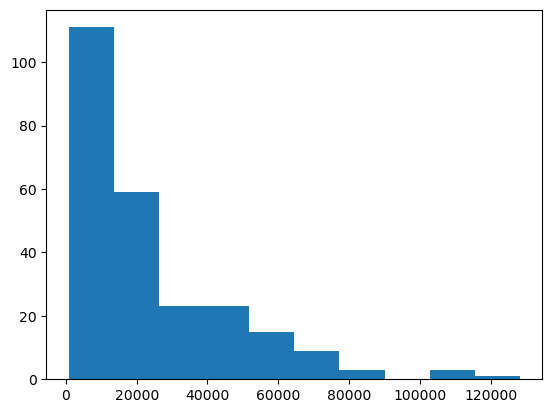

In [21]:
plt.hist(gdp_2020['GDP_Per_Capita'])

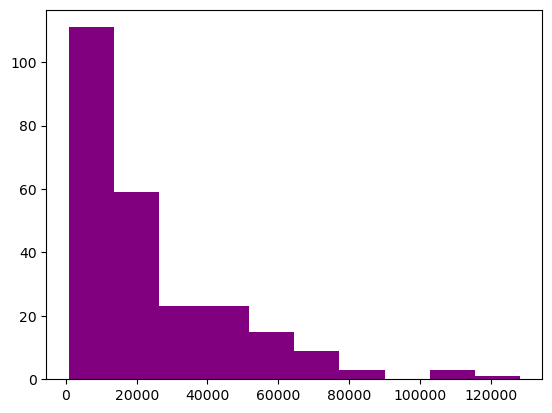

In [22]:
fig, ax = plt.subplots()
ax.hist(gdp_2020['GDP_Per_Capita'], color = 'purple')
plt.show()

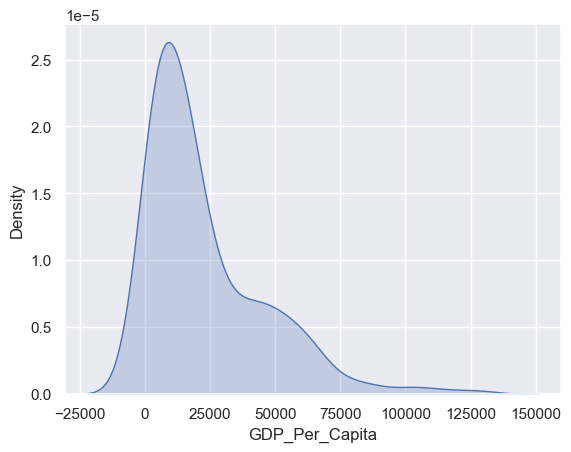

In [23]:
sns.set_theme(style="darkgrid")
sns.kdeplot(gdp_2020['GDP_Per_Capita'],warn_singular=False,fill=True )
plt.show()

<Axes: xlabel='GDP_Per_Capita'>

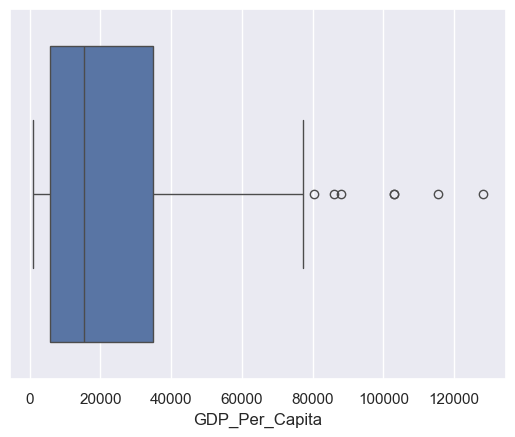

In [24]:
sns.boxplot(  x=gdp_2020["GDP_Per_Capita"] )

<Axes: xlabel='GDP_Per_Capita'>

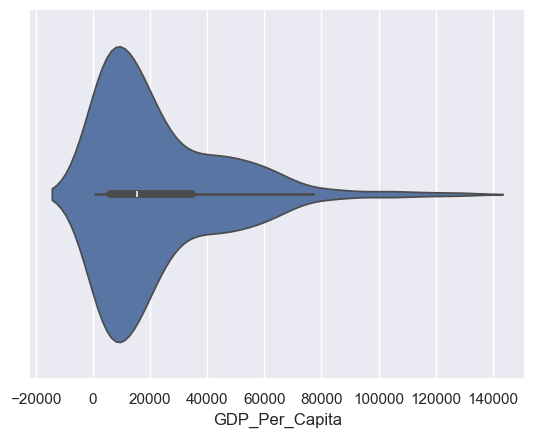

In [25]:
sns.violinplot(x=gdp_2020["GDP_Per_Capita"])

In [26]:
## What was the median GDP per capita value in 2020?

In [27]:
gdp_2020['GDP_Per_Capita'].median()

15309.23598817024

In [28]:
##For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020.
##Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.
##Using this, create the following 4 plots:
##	* A boxplot
##	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
##	* A scatterplot
##	* A scatterplot with a trend line overlaid
##Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [29]:
gdp_df['gdp_decades'] = (gdp_df['Year']// 10) *10
gdp_df.head()

,Country,Year,GDP_Per_Capita,gdp_decades
0,Afghanistan,2023,1992.424394,2020
1,Afghanistan,2022,1981.710168,2020
2,Afghanistan,2021,2144.166570,2020
3,Afghanistan,2020,2769.685745,2020
4,Afghanistan,2019,2927.245144,2010


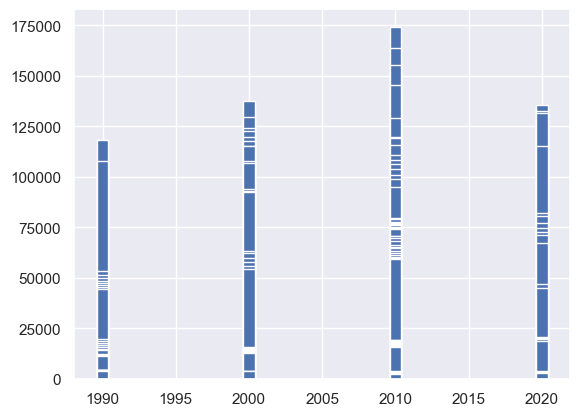

In [30]:

fig,ax = plt.subplots()
ax.bar(gdp_df['gdp_decades'], gdp_df['GDP_Per_Capita'])
plt.show()

(0.0, 60000.0)

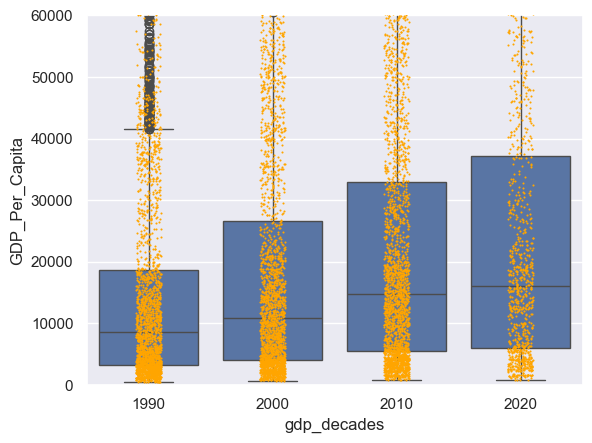

In [31]:
sns.boxplot(  x=gdp_df["gdp_decades"], y=gdp_df['GDP_Per_Capita' ])
ax = sns.stripplot(x=gdp_df["gdp_decades"], y=gdp_df['GDP_Per_Capita'], color="orange", jitter=0.1, size=1.5)
plt.ylim(0,60000)

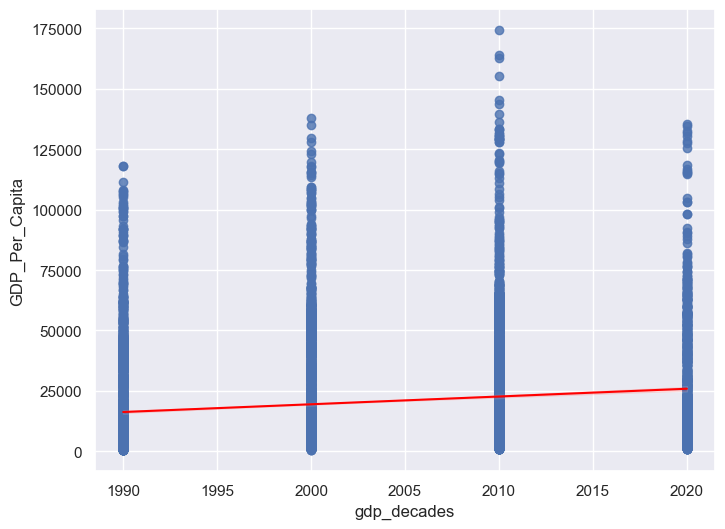

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_df["gdp_decades"],
    y=gdp_df["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)
plt.show()

In [33]:
gdp_first_100000 = gdp_df[gdp_df['GDP_Per_Capita'] >100000]
gdp_first_100000.head(1)

,Country,Year,GDP_Per_Capita,gdp_decades
750,Bermuda,2011,101174.504104,2010


In [34]:
max_row_index = [gdp_2020['GDP_Per_Capita'].idxmax()]
gdp_2020_max = gdp_2020.loc[max_row_index, ['GDP_Per_Capita','Country']]
gdp_2020_max

,GDP_Per_Capita,Country
4426,128256.560341,Luxembourg


In [35]:
gdp_lux = gdp_df[gdp_df['Country'].isin(['Luxembourg'])]
gdp_lux.head()

,Country,Year,GDP_Per_Capita,gdp_decades
4423,Luxembourg,2023,130373.477942,2020
4424,Luxembourg,2022,134507.667531,2020
4425,Luxembourg,2021,135379.291201,2020
4426,Luxembourg,2020,128256.560341,2020
4427,Luxembourg,2019,131609.099616,2010


Text(0.5, 1.0, 'Luxembourg Per Capita')

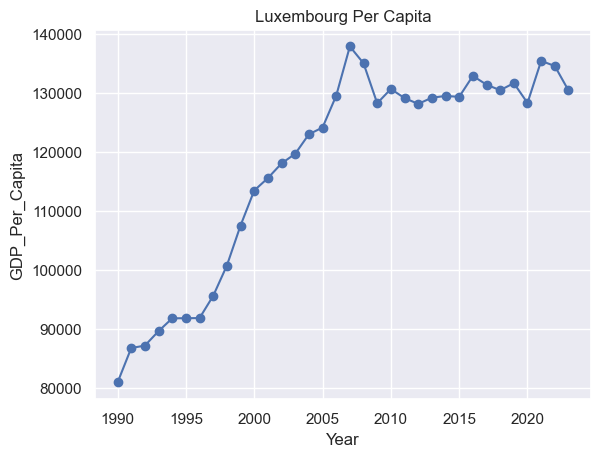

In [36]:
plt.plot(gdp_lux['Year'], gdp_lux['GDP_Per_Capita'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title('Luxembourg Per Capita')

In [37]:
min_row = [gdp_2020['GDP_Per_Capita'].idxmin()]
gdp_2020_min = gdp_2020.loc[min_row, ['GDP_Per_Capita','Country']]
gdp_2020_min

,GDP_Per_Capita,Country
1046,833.920257,Burundi


In [38]:
gdp_bur = gdp_df[gdp_df['Country'].isin(['Burundi'])]
gdp_bur.head()

,Country,Year,GDP_Per_Capita,gdp_decades
1043,Burundi,2023,828.861074,2020
1044,Burundi,2022,829.387160,2020
1045,Burundi,2021,836.665571,2020
1046,Burundi,2020,833.920257,2020
1047,Burundi,2019,855.732720,2010


Text(0.5, 1.0, 'Burundi Per Capita')

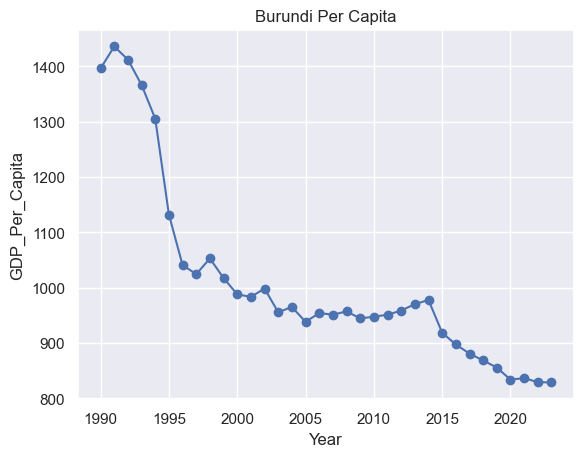

In [39]:

plt.plot(gdp_bur['Year'], gdp_bur['GDP_Per_Capita'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title('Burundi Per Capita')

In [40]:
int_df = pd.read_csv('../data/internet_use.csv')
int_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [41]:
int_df=int_df.drop(columns=('Value Footnotes'))

In [42]:
int_df = int_df.rename(columns = {'Country or Area':'Country', 'Value': 'Internet_Users_Pct'})
int_df.tail()

,Country,Year,Internet_Users_Pct
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000


In [43]:
int_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [44]:
int_first_0 = int_df[int_df['Internet_Users_Pct'] >0]
int_first_0_desc = int_first_0.sort_values(by='Year', ascending = True)
int_first_0_desc.head(50)

,Country,Year,Internet_Users_Pct
339,Austria,1990,0.130369
2001,Finland,1990,0.401088
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
543,Belgium,1990,0.001007
5777,United Kingdom,1990,0.087355
5299,Sweden,1990,0.584192
3980,Netherlands (Kingdom of the),1990,0.334387
5332,Switzerland,1990,0.595714


In [45]:
int_2014 = int_df[int_df['Year'].isin([2014])]
int_2014_desc = int_2014.sort_values(by='Internet_Users_Pct', ascending = False)
int_2014_desc.head()

,Country,Year,Internet_Users_Pct
2592,Iceland,2014,98.1580
1893,Falkland (Malvinas) Islands,2014,97.6000
602,Bermuda,2014,96.8000
4173,Norway,2014,96.3005
1546,Denmark,2014,95.9935


Text(0.5, 1.0, '2014_usage')

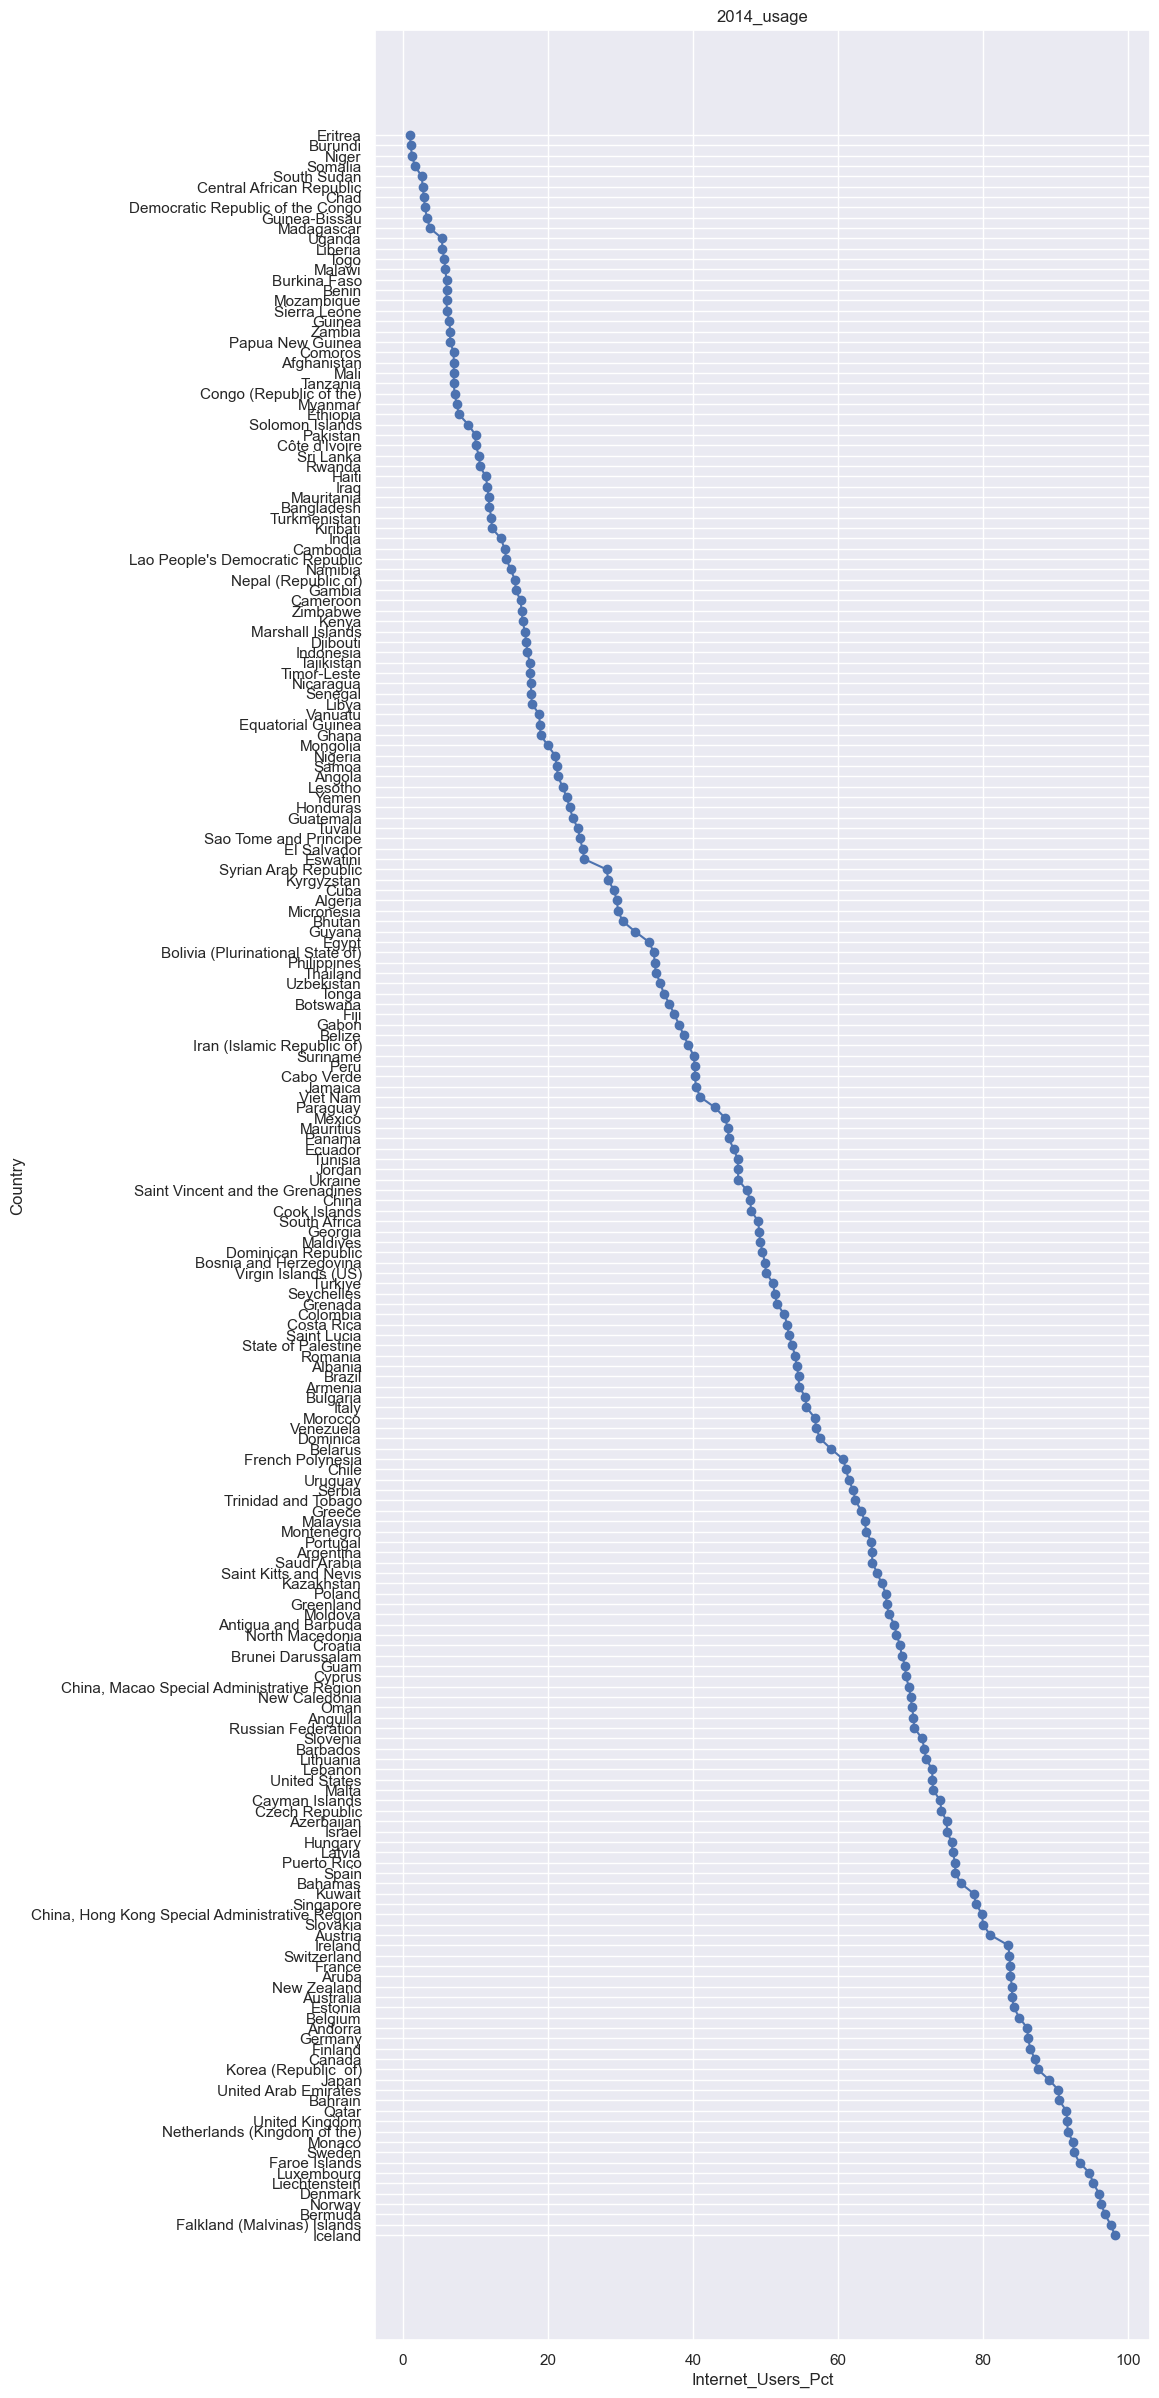

In [46]:
plt.figure(figsize=(10, 30))
plt.plot(int_2014_desc['Internet_Users_Pct'], int_2014_desc['Country'], marker='o', linestyle='-')
plt.xlabel('Internet_Users_Pct')
plt.ylabel('Country')
plt.title('2014_usage')



In [47]:
int_2000 = int_df[int_df['Year'].isin([2000])]
int_2000_desc = int_2000.sort_values(by='Internet_Users_Pct', ascending = False)
int_2000_desc.head()


,Country,Year,Internet_Users_Pct
1907,Falkland (Malvinas) Islands,2000,58.6207
4187,Norway,2000,52.0000
1000,Canada,2000,51.3000
4757,San Marino,2000,48.7995
4026,New Zealand,2000,47.3796


Text(0.5, 1.0, '2000_usage')

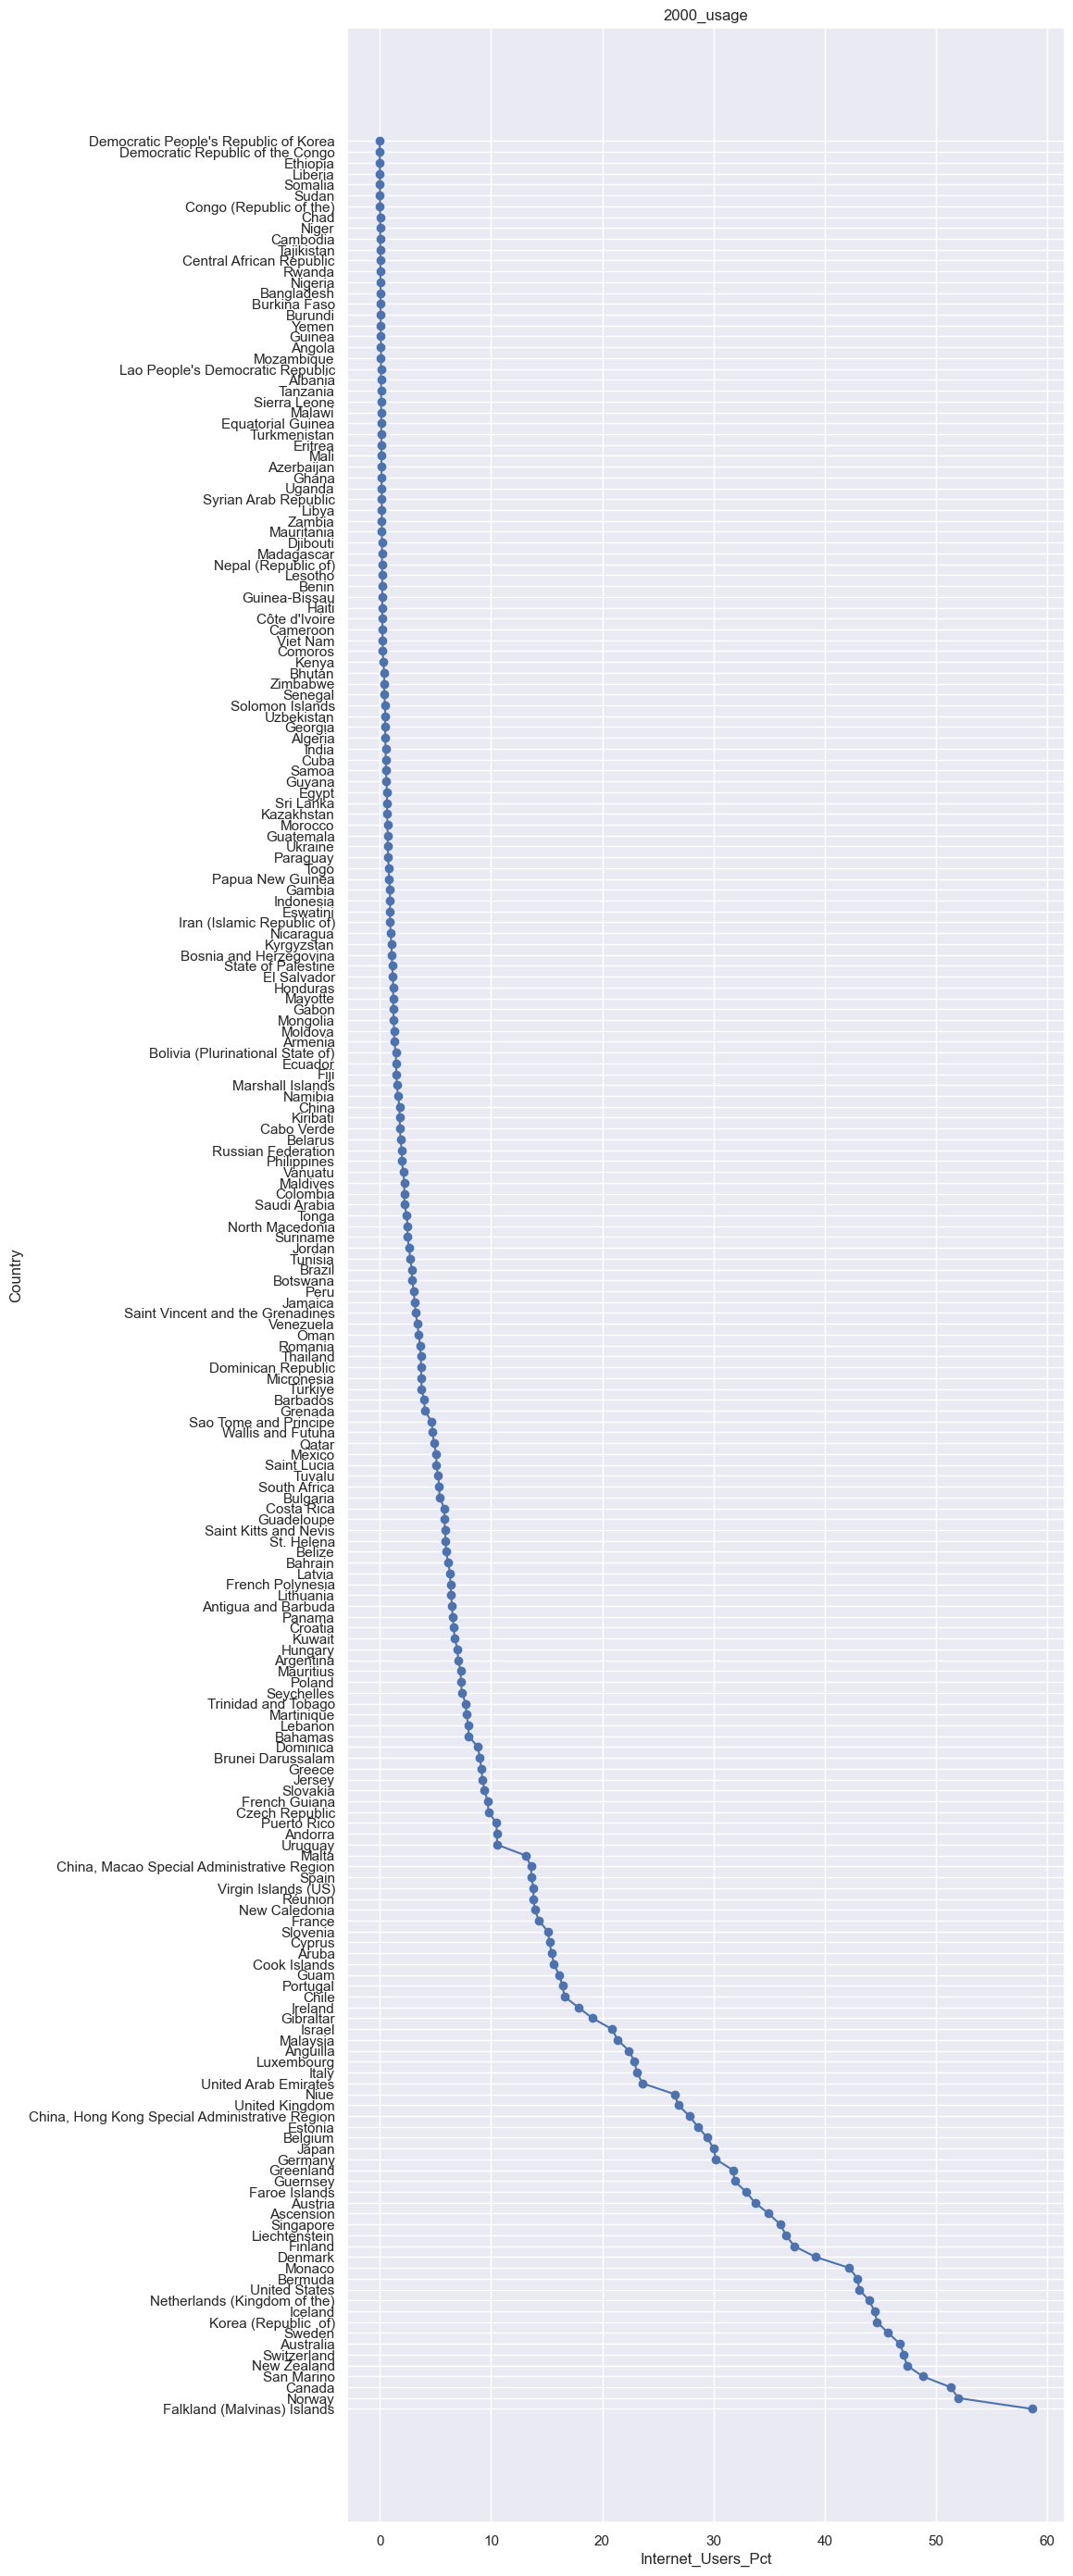

In [48]:
plt.figure(figsize=(10, 35))
plt.plot(int_2000_desc['Internet_Users_Pct'], int_2000_desc['Country'], marker='o', linestyle='-')
plt.xlabel('Internet_Users_Pct')
plt.ylabel('Country')
plt.title('2000_usage')

In [49]:
int_2014_count = int_2014[int_2014['Internet_Users_Pct']<5]
int_2014_count.count()

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

In [50]:
gdp_and_internet_use = pd.merge(gdp_df, int_df, on=['Country', 'Year'], how='outer')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,gdp_decades,Internet_Users_Pct
0,Afghanistan,1990,NaN,NaN,0.000000
1,Afghanistan,2000,1617.826475,2000.0,NaN
2,Afghanistan,2001,1454.110782,2000.0,0.004723
3,Afghanistan,2002,1774.308743,2000.0,0.004561
4,Afghanistan,2003,1815.928200,2000.0,0.087891


In [51]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,gdp_decades,Internet_Users_Pct
9494,Zimbabwe,2019,3294.806084,2010.0,26.5883
9495,Zimbabwe,2020,2987.269823,2020.0,29.2986
9496,Zimbabwe,2021,3184.785451,2020.0,32.4616
9497,Zimbabwe,2022,3323.121932,2020.0,32.5615
9498,Zimbabwe,2023,3442.251327,2020.0,NaN


In [52]:
gdp_and_internet_use=gdp_and_internet_use.drop(columns=('gdp_decades'))
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


In [53]:
gdp_and_internet_use_top3 = gdp_and_internet_use.sort_values(by = 'Internet_Users_Pct', ascending = False)
gdp_and_internet_use_top3.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7053,Qatar,2022,114740.123615,100.0
7052,Qatar,2021,116832.570290,100.0
594,Bahrain,2022,57465.172978,100.0
7409,Saudi Arabia,2022,57351.874387,100.0
9007,United Arab Emirates,2020,65784.676939,100.0


In [54]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2014])]
gdp_and_internet_use_top = gdp_and_internet_use_2014.sort_values(by='Internet_Users_Pct', ascending = False)
gdp_and_internet_use_top3 = gdp_and_internet_use_top.head(3)
gdp_and_internet_use_top3.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3944,Iceland,2014,57981.199448,98.158
2867,Falkland (Malvinas) Islands,2014,NaN,97.600
824,Bermuda,2014,92298.387811,96.800


In [55]:
gdp_and_internet_use_top3_ovrl = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland','Falkland (Malvinas) Islands','Bermuda'])]
gdp_and_internet_use_top3_ovrl.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
800,Bermuda,1990,79109.890650,0.0
801,Bermuda,1991,75754.494259,NaN
802,Bermuda,1992,75160.932166,NaN
803,Bermuda,1993,76883.813796,NaN
804,Bermuda,1994,76850.912239,NaN


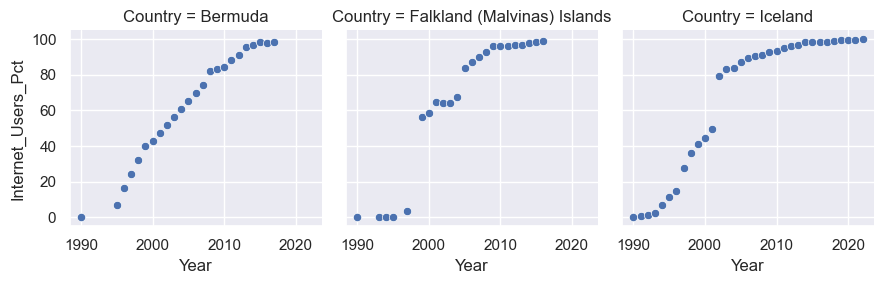

In [124]:
top_3 = sns.FacetGrid(gdp_and_internet_use_top3_ovrl, col='Country')
top_3.map_dataframe(sns.scatterplot, x="Year", y="Internet_Users_Pct")